In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Sample correlations from https://doi.org/10.1111/tpj.13312
heatmap = pd.read_excel('supplemental_data/tpj13312-sup-0002-tables1-s26.xlsx', sheet_name='Table 3', index_col=0, header=1)

In [3]:
samples = pd.read_csv('supplemental_data/SraRunTable.txt')['Sample Name'].apply(lambda x: x.split('(')[1][:-1]).to_list()

In [4]:
sample_names = []
for idx, name in enumerate(samples):
    if idx < 16:
        sample_names.append(name+'_1')
    else:
        sample_names.append(name+'_2')

In [5]:
names = pd.read_csv('supplemental_data/SraRunTable.txt')['Sample Name'].apply(lambda x: x.split('(')[0])

In [6]:
d_labs = {}
for key, val in zip(sample_names, names):
    d_labs[key] = val

In [7]:
my_cols = []
for idx, col in enumerate(heatmap.columns):
    if col.split('_')[0] in samples:
        my_cols.append(col)

In [8]:
sns.set(font_scale=1.2)
sns.set_style('white')

In [9]:
## Must run this cell to get labels for proper formatting for next cell

mask = np.ones_like(heatmap[my_cols].loc[my_cols])
mask = np.triu(mask, 1)
g = sns.clustermap(heatmap[my_cols].loc[my_cols], cmap="YlGnBu", figsize=(12, 12),dendrogram_ratio=0.2)

labs = g.ax_heatmap.yaxis.get_majorticklabels()

values = g.ax_heatmap.collections[0].get_array().reshape(mask.shape)
new_values = np.ma.array(values, mask=mask)
g.ax_heatmap.collections[0].set_array(new_values)
g.ax_col_dendrogram.set_visible(False)
plt.close()

my_labels = []
for idx, lab in enumerate(labs):
    if idx%2 == 0:
        my_labels.append(d_labs[lab.get_text()][:-1] + '_1')
    else:
        my_labels.append(d_labs[lab.get_text()][:-1] + '_2')

Text(0.5, 1.0, 'RNA-Seq\nPearson\ncorrelation\ncoefficient\n')

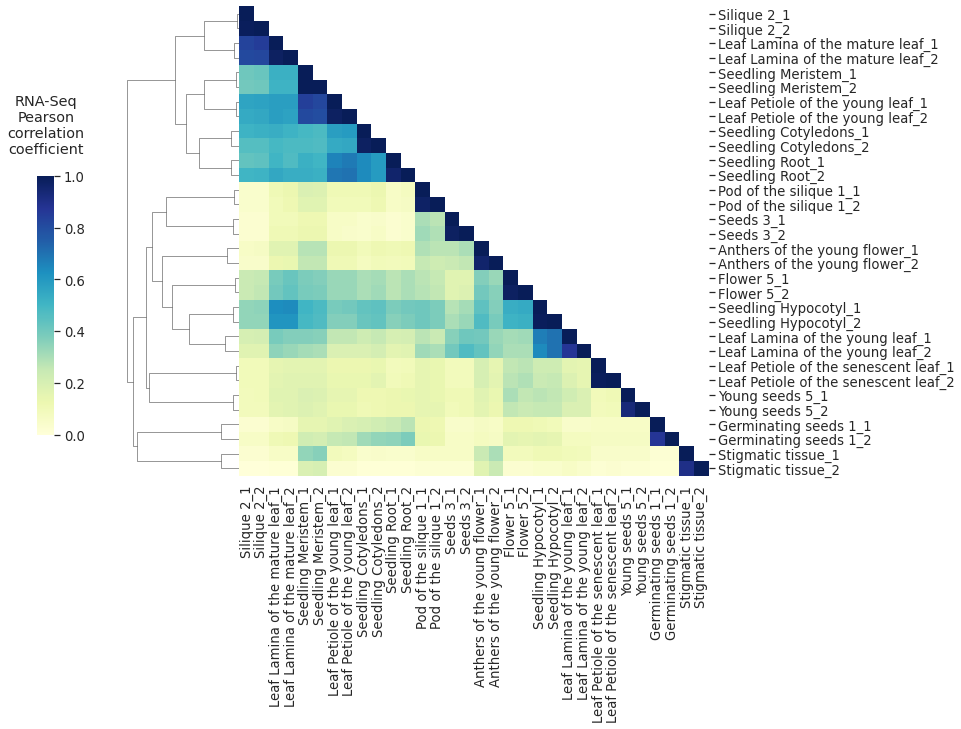

In [10]:
mask = np.ones_like(heatmap[my_cols].loc[my_cols])
mask = np.triu(mask, 1)
g = sns.clustermap(heatmap[my_cols].loc[my_cols], cmap="YlGnBu", xticklabels=my_labels, yticklabels=my_labels, figsize=(12, 12),dendrogram_ratio=0.2)

labs = g.ax_heatmap.yaxis.get_majorticklabels()
g.ax_cbar.set_position((-0.08, .35, .02, .3))
g.ax_cbar.set_title('RNA-Seq\nPearson\ncorrelation\ncoefficient\n')

values = g.ax_heatmap.collections[0].get_array().reshape(mask.shape)
new_values = np.ma.array(values, mask=mask)
g.ax_heatmap.collections[0].set_array(new_values)
g.ax_col_dendrogram.set_visible(False)

g.savefig('figs/figS2.png')